In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import matplotlib
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

In [4]:
hyp_df = pd.read_csv('_data/Hyperbolic_rec_miss.csv')
exp_df = pd.read_csv('_data/Exponential_rec_miss.csv')
new_order = [
    'a_true', 'a_estimate', 'ndt_true', 'ndt_estimate',
    'delta_true', 'delta_estimate', 'sigma_true', 'sigma_estimate',
    'lambda_true', 'lambda_estimate',
]
hyp_df = hyp_df[new_order].to_numpy()
even = hyp_df[:, 0::2]
odd = hyp_df[:, 1::2]
hyperbolic = np.stack((even, odd), axis=-1)
exp_df = exp_df[new_order].to_numpy()
even = exp_df[:, 0::2]
odd = exp_df[:, 1::2]
exponential = np.stack((even, odd), axis=-1)
recovery = [exponential, hyperbolic]

In [98]:
param_names = [
    r'Threshold ($\theta$)', r'NDT ($\tau$)',
    r'Drift rate ($v$)', r'Observation noise ($\sigma_z$)',
    r'Decay ($\lambda$)'    
]

In [99]:
FONT_SIZE_2 = 19
FONT_SIZE_3 = 13

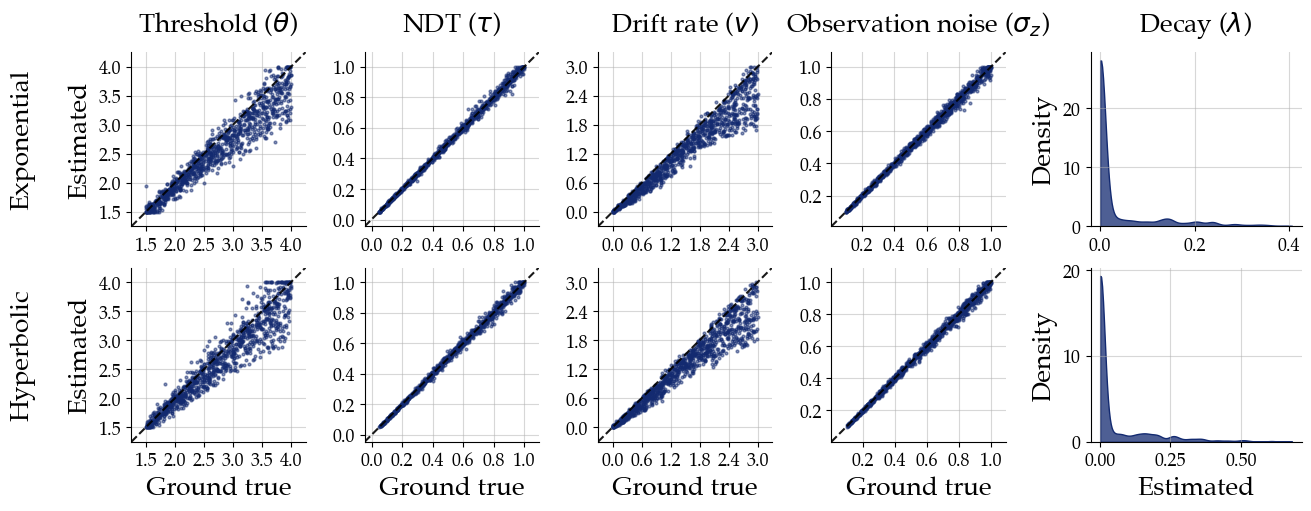

In [100]:
fig, axs = plt.subplots(2, 5, figsize=(13, 5), layout='constrained')

for i in range(2):
    for j in range(5):
        ax = axs[i, j]
        if j < 4:
            x = recovery[i][:, j, 0]
            y = recovery[i][:, j, 1]
            ax.plot(x, y, 'o', markersize=2, color="#132a70", alpha=0.5)
            lower = min(x.min(), y.min())
            upper = max(x.max(), y.max())
            eps = (upper - lower) * 0.1
            lims = (lower - eps, upper + eps)
            ax.set_xlim(lims)
            ax.set_ylim(lims)
            locator = MaxNLocator(nbins=7)
            formatter = FormatStrFormatter('%.1f')
            ax.xaxis.set_major_locator(locator)
            ax.yaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.yaxis.set_major_formatter(formatter)
            # Diagonal line
            ax.plot(lims, lims, color="black", alpha=0.9, linestyle="dashed")
            ax.set_aspect('equal', adjustable='box')
        else:
            sns.kdeplot(
                recovery[i][:, j, 1],
                ax=axs[i, j],
                color="#132a70",
                alpha=0.75,
                fill=True,
                bw_adjust=0.5,
                cut=0
            )
            axs[i, j].set_ylabel("Density", fontsize=FONT_SIZE_2)

        if i == 0:
            axs[i, j].set_title(param_names[j], fontsize=FONT_SIZE_2, pad=15)
        if j == 0 and i == 0:
            axs[i, j].set_ylabel('Exponential\n\n' + "Estimated", fontsize=FONT_SIZE_2)
        if j == 0 and i == 1:
            axs[i, j].set_ylabel('Hyperbolic\n\n' + "Estimated", fontsize=FONT_SIZE_2)
        if i == 1 and j != 4:
            axs[i, j].set_xlabel("Ground true", fontsize=FONT_SIZE_2)
        if i == 1 and j == 4:
            axs[i, j].set_xlabel("Estimated", fontsize=FONT_SIZE_2)
        axs[i, j].tick_params(labelsize=FONT_SIZE_3)
        axs[i, j].grid(alpha=0.5)

sns.despine()

plt.savefig(
    f'../../plots/IE_recovery_missspecification_plot.pdf',
    transparent=True, dpi=600,
    bbox_inches='tight'
)